This dataset contains information about users from a company’s database. It contains information about UserID, Gender, Age, EstimatedSalary, and Purchased. We are using this dataset for predicting whether a user will purchase the company’s newly launched product or not.

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the dataset
dataset = pd.read_csv("User_Data.csv")
dataset.head

<bound method NDFrame.head of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In order to find wether a customer will buy or not, we need to see the 
relationship between Age and estimated salary. So here Id and Gender are not relevant factors.

In [3]:
# Independant Variable
x = dataset.iloc[:,[2,3]].values
# Dependant Variable
y = dataset.iloc[:, 4].values

Splitting the dataset to train and test. 75% of data is used for training the model and 25% of it is used to test the performance of our model.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

Now, it is very important to perform feature scaling here because Age and Estimated Salary values lie in different ranges. If we don’t scale the features then the Estimated Salary feature will dominate the Age feature when the model finds the nearest neighbor to a data point in the data space. 

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

print(X_train[0:10,:])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


Here once see that Age and Estimated salary features values are scaled and now there in the -1 to 1. Hence, each feature will contribute equally to decision making i.e. finalizing the hypothesis. 

Finally, we are training our Logistic Regression model. 

In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

Evaluation Metrics
Metrics are used to check the model performance on predicted values and actual values.

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix: ",cm)

Confusion Matrix:  [[63  5]
 [ 8 24]]


Out of 100 : 
True Positive + True Negative = 63 + 24 
False Positive + False Negative = 5 + 8
Performance measure – Accuracy 

In [9]:
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_test,y_pred))

Accuracy:  0.87


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


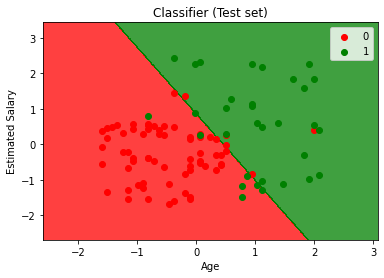

In [10]:
# Visualizing our model
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, 
                               stop = X_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(
             np.array([X1.ravel(), X2.ravel()]).T).reshape(
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
      
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()